In [2]:
from LinearModel import LogisticRegression

# Creating Data

Before we can test out the implementation, we need to create some data. To create the best case for logistic regression, I am sampling independent Bernoulli trials where the probability of a `1` is $\frac{1}{1+e^{X\beta}}$. This is the exact form that logistic regression assumes.

In [8]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

np.random.seed(2)

cols = 4
n = 100

beta = np.random.normal(scale=1, size=cols)
x = np.random.normal(size=(n, cols-1))

X = np.insert(x, 0, np.repeat(1, n), axis=1)

log_odds = np.matmul(X, beta) + np.random.normal(scale=0.001, size=n)
probs = 1/(1+np.exp(-log_odds))

my_bernoulli = bernoulli(p=probs)
y = my_bernoulli.rvs()

my_logistic = LogisticRegression()
my_logistic.add_intercept = False
my_logistic.fit(X, y, method="Newton-CG")

Optimization terminated successfully.


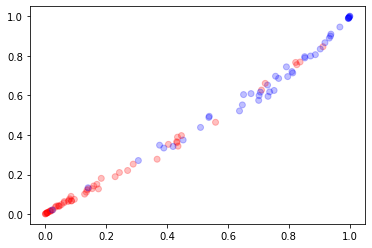

In [4]:
plt.scatter(my_logistic.predict_probabilities(X), probs,
            color=np.where(y == 1, "blue", "red"),
            alpha=0.25)
plt.show()

In [6]:
print(np.round(my_logistic.beta_hat, 4))

[-0.0798  0.0272 -2.2801  1.8417]


In [5]:
 y_hat = my_logistic.predict_classes(X)

np.sum(y_hat == y)/n

0.86

In [7]:
import statsmodels.api as sm

# building the model and fitting the data
log_reg = sm.Logit(y, X).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.375544
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       96
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Jun 2021   Pseudo R-squ.:                  0.4543
Time:                        22:38:18   Log-Likelihood:                -37.554
converged:                       True   LL-Null:                       -68.814
Covariance Type:            nonrobust   LLR p-value:                 1.702e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0798      0.299     -0.267      0.789      -0.665       0.505
x1             0.0272      0.